In [1]:
import pandas as pd
import numpy as np
from varname import nameof

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import html
import lxml

In [2]:
df_path = "../data/Health/"

demographic = pd.read_csv(df_path + "demographic.csv")
diet = pd.read_csv(df_path + "diet.csv")
examination = pd.read_csv(df_path + "examination.csv")
labs = pd.read_csv(df_path + "labs.csv")
medications = pd.read_csv(df_path + "medications.csv")
questionnaire = pd.read_csv(df_path + "questionnaire.csv")

datasets = [demographic, diet, examination, labs, medications, questionnaire]

In [3]:
full_df = pd.merge(demographic, diet, how = "outer", on = "SEQN")
full_df = pd.merge(full_df, examination, how = "outer", on = "SEQN")
full_df = pd.merge(full_df, labs, how = "outer", on = "SEQN")
#full_df = pd.merge(full_df, medications, how = "outer", on = "SEQN")           # This one doesn't match correctly on SEQN, so I'll leave it out as it is not interesting for me anyway
full_df = pd.merge(full_df, questionnaire, how = "outer", on = "SEQN")

full_df.shape

(10175, 1812)

In [4]:
final_columns_df = pd.read_csv("../data/Health/final_column_names.csv")
final_columns = final_columns_df["column"]
final_columns.values

array(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'WTDRD1', 'WTDR2D', 'DR1TNUMF',
       'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE',
       'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TATOC', 'DR1TVARA', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TCHL',
       'DR1TVB12', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS',
       'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TSODI', 'DR1TPOTA',
       'PEASCST1', 'BPXPTY', 'BMXWT', 'BMXBMI', 'CSQ190', 'CSQ200',
       'CSQ202', 'CSQ204', 'DID040', 'DIQ160', 'MCQ080', 'MCQ082',
       'OSQ060', 'PAQ610', 'PAD615', 'WHD110', 'WHD120'], dtype=object)

In [5]:
# After joining all the datasets and checking what columns I need/want, this is the result
final_df = full_df[final_columns.values]
final_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTDRD1,WTDR2D,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,...,CSQ204,DID040,DIQ160,MCQ080,MCQ082,OSQ060,PAQ610,PAD615,WHD110,WHD120
0,73557,1,69,16888.327864,12930.890649,11.0,1574.0,43.63,239.59,176.47,...,2.0,62.0,NaN,1.0,2.0,2.0,NaN,NaN,270.0,200.0
1,73558,1,54,17932.143865,12684.148869,8.0,5062.0,338.13,423.78,44.99,...,2.0,23.0,NaN,2.0,2.0,2.0,NaN,NaN,240.0,250.0
2,73559,1,72,59641.812930,39394.236709,27.0,1743.0,64.61,224.39,102.90,...,2.0,57.0,NaN,2.0,2.0,1.0,NaN,NaN,180.0,190.0
3,73560,1,9,142203.069917,125966.366442,19.0,1490.0,77.75,162.92,80.58,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,73561,2,73,59052.357033,39004.892993,7.0,1421.0,55.24,178.20,87.78,...,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,150.0,135.0


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10174
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   RIAGENDR  10175 non-null  int64  
 2   RIDAGEYR  10175 non-null  int64  
 3   WTDRD1    9813 non-null   float64
 4   WTDR2D    8661 non-null   float64
 5   DR1TNUMF  8661 non-null   float64
 6   DR1TKCAL  8531 non-null   float64
 7   DR1TPROT  8531 non-null   float64
 8   DR1TCARB  8531 non-null   float64
 9   DR1TSUGR  8531 non-null   float64
 10  DR1TFIBE  8531 non-null   float64
 11  DR1TTFAT  8531 non-null   float64
 12  DR1TSFAT  8531 non-null   float64
 13  DR1TMFAT  8531 non-null   float64
 14  DR1TPFAT  8531 non-null   float64
 15  DR1TCHOL  8531 non-null   float64
 16  DR1TATOC  8531 non-null   float64
 17  DR1TVARA  8531 non-null   float64
 18  DR1TVB6   8531 non-null   float64
 19  DR1TFOLA  8531 non-null   float64
 20  DR1TFA    8531 non-null   fl

In [7]:
descriptions = pd.read_csv("../data/Health/final_column_names.csv")
descriptions.head()

,column,description
0,SEQN,Respondent sequence number.
1,RIAGENDR,Gender of the participant.
2,RIDAGEYR,Age in years of the participant at the time of...
3,WTDRD1,Dietary day one sample weight
4,WTDR2D,Dietary two-day sample weight


In [8]:
descriptions[descriptions["column"] == "SEQN"]["description"][0]

'Respondent sequence number.'

In [9]:
columns_to_drop = []

for column in final_df.columns:

    missing_values = final_df[column].isna().sum()
    description = descriptions[descriptions["column"] == column]["description"].values[0]

    if missing_values > 7000:
        print(f"{column} : {description} has {missing_values} missing values")
        print("-" * 80)
        columns_to_drop.append(column)

CSQ190 : During the past 12 months, {have you/has SP} experienced a problem with {your/his/her} general health, work or {your/his/her} enjoyment of life because of a problem with {your/his/her) ability to taste or smell? has 8489 missing values
--------------------------------------------------------------------------------
DID040 : How old {was SP/were you} when a doctor or other health professional first told {you/him/her} that {you/he/she} had diabetes or sugar diabetes? has 9438 missing values
--------------------------------------------------------------------------------
PAQ610 : In a typical week, on how many days {do you/does SP} do vigorous-intensity activities as part of {your/his/her} work? has 9003 missing values
--------------------------------------------------------------------------------
PAD615 : How much time {do you/does SP} spend doing vigorous-intensity activities at work on a typical day? has 9007 missing values
----------------------------------------------------

In [10]:
final_df_2 = final_df.drop(columns_to_drop, axis = 1)
final_df_2 = final_df_2.set_index("SEQN")
final_df_2.head()

,RIAGENDR,RIDAGEYR,WTDRD1,WTDR2D,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,...,BMXBMI,CSQ200,CSQ202,CSQ204,DIQ160,MCQ080,MCQ082,OSQ060,WHD110,WHD120
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,1,69,16888.327864,12930.890649,11.0,1574.0,43.63,239.59,176.47,10.8,...,26.7,2.0,1.0,2.0,NaN,1.0,2.0,2.0,270.0,200.0
73558,1,54,17932.143865,12684.148869,8.0,5062.0,338.13,423.78,44.99,16.7,...,28.6,2.0,2.0,2.0,NaN,2.0,2.0,2.0,240.0,250.0
73559,1,72,59641.812930,39394.236709,27.0,1743.0,64.61,224.39,102.90,9.9,...,28.9,2.0,2.0,2.0,NaN,2.0,2.0,1.0,180.0,190.0
73560,1,9,142203.069917,125966.366442,19.0,1490.0,77.75,162.92,80.58,10.6,...,17.1,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
73561,2,73,59052.357033,39004.892993,7.0,1421.0,55.24,178.20,87.78,12.3,...,19.7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,150.0,135.0


In [11]:
#sns.heatmap(final_df_2, square = True, linewidths = .3, cmap = sns.cm.rocket_r, annot = True)

In [15]:
for i in final_df_2.columns[:5]: print(i)

RIAGENDR
RIDAGEYR
WTDRD1
WTDR2D
DR1TNUMF


In [31]:
def box_plot(df, column):
    fig, ax = plt.subplots(figsize = (6, 6))

    sns.boxplot(x = df[column])

    plt.xlabel(descriptions[descriptions["column"] == column]["description"].values[0])

ipykernel_launcher:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


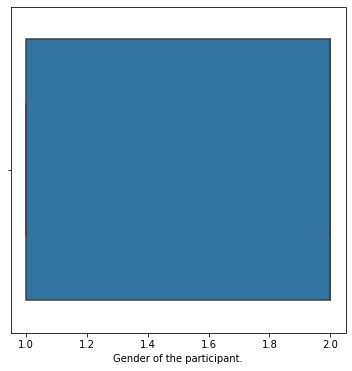

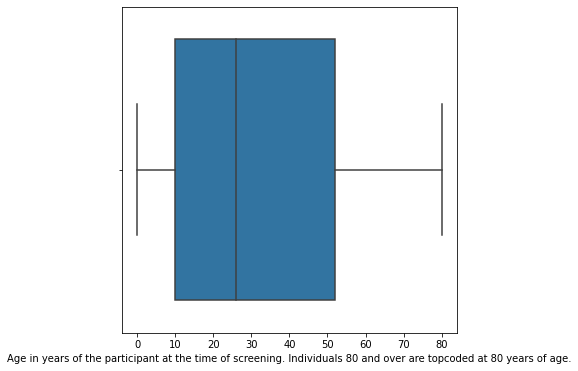

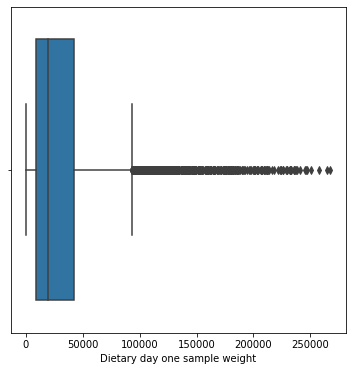

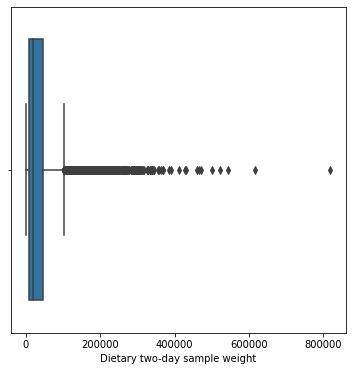

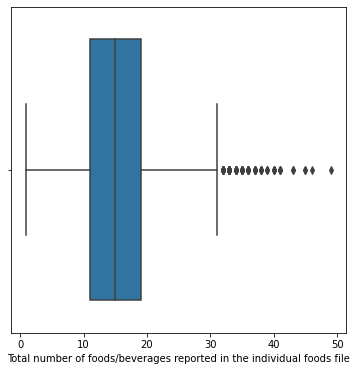

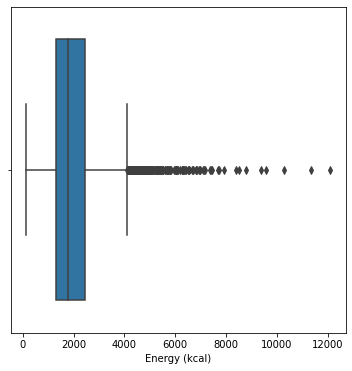

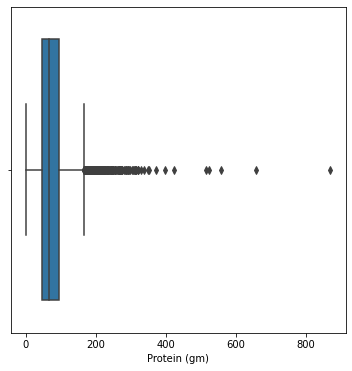

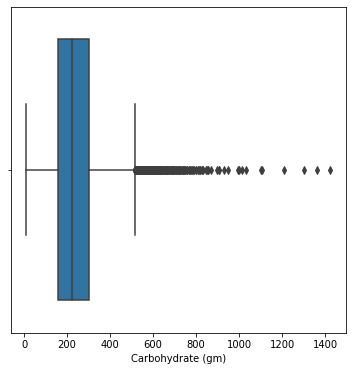

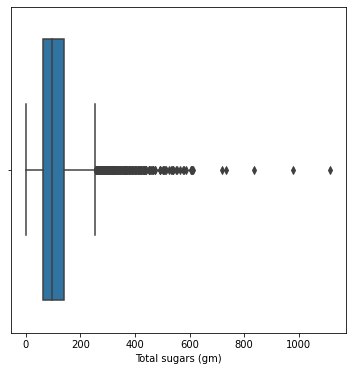

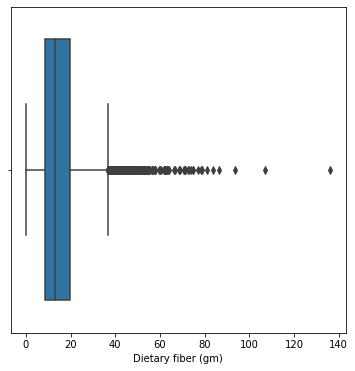

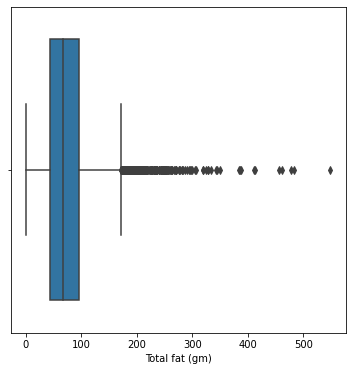

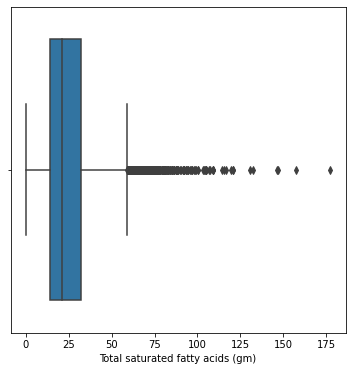

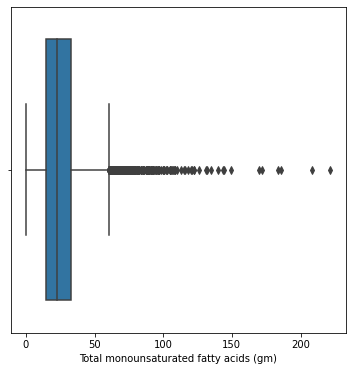

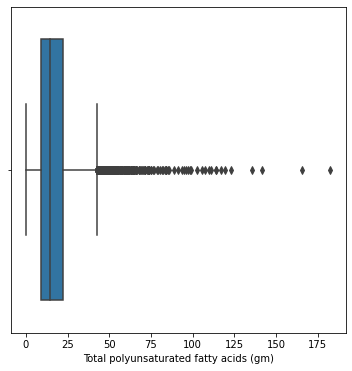

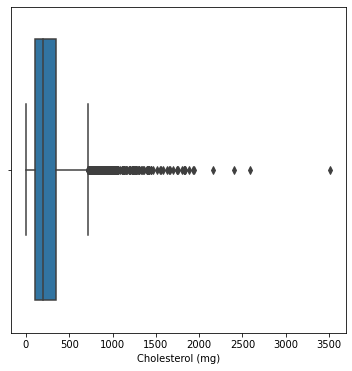

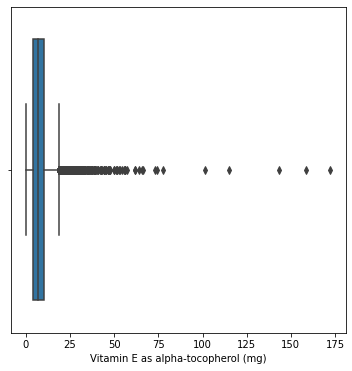

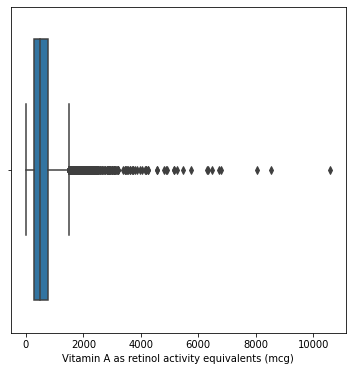

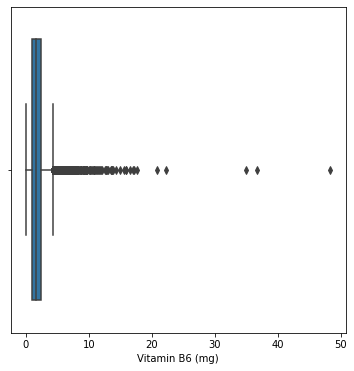

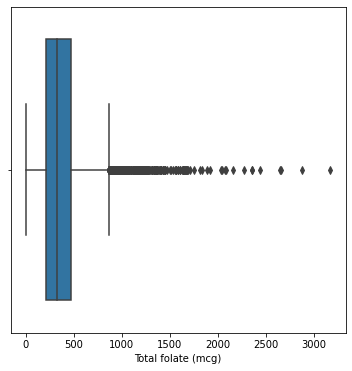

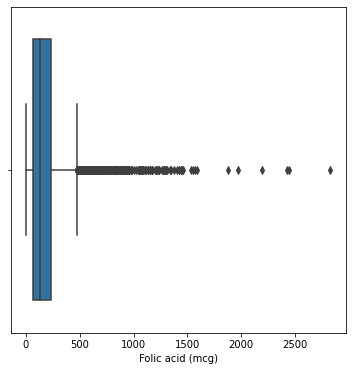

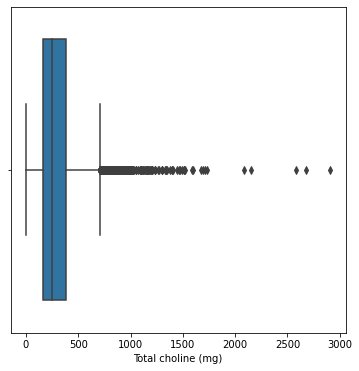

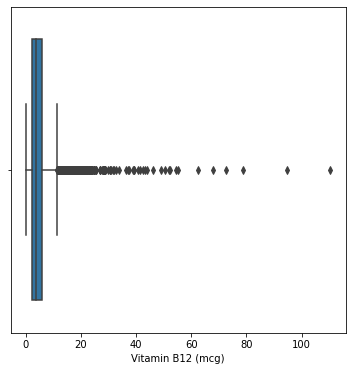

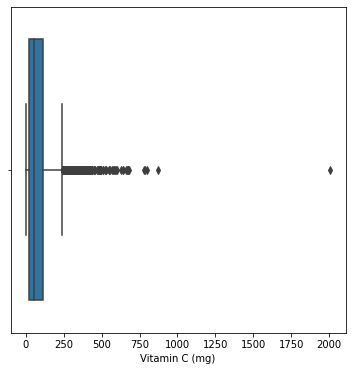

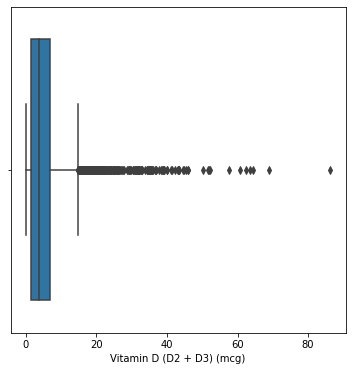

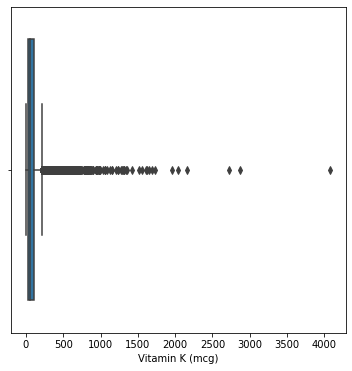

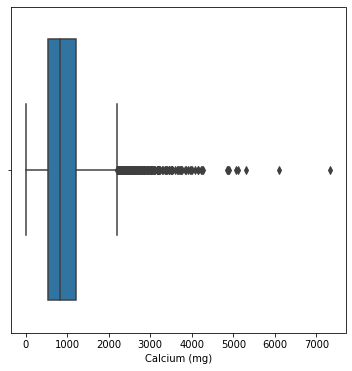

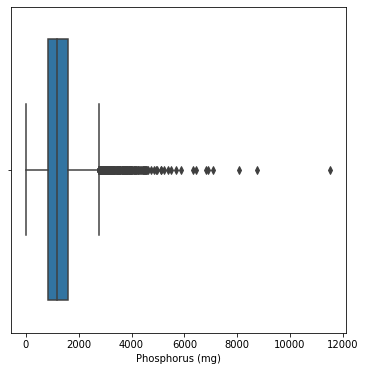

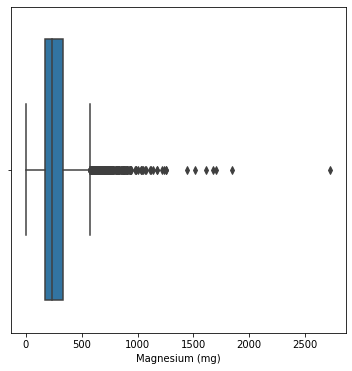

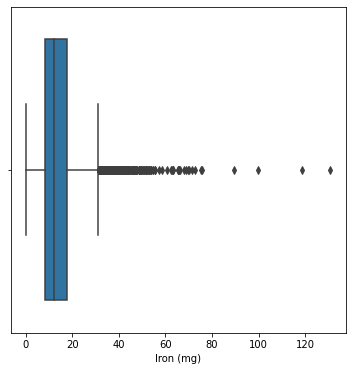

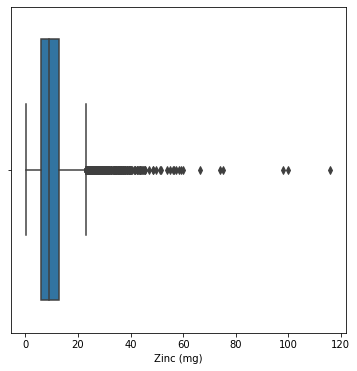

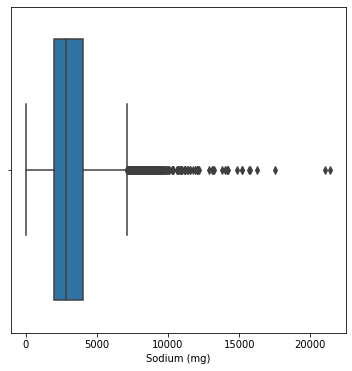

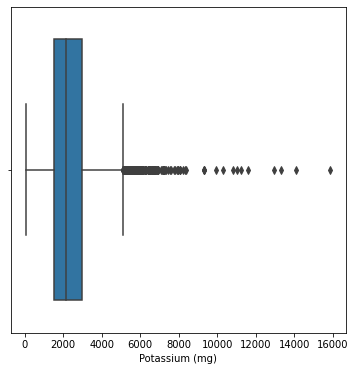

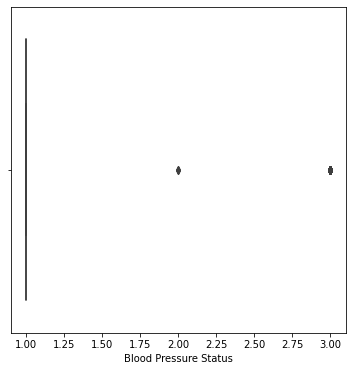

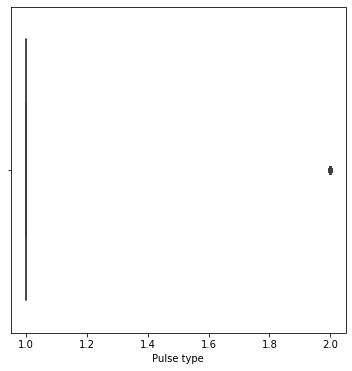

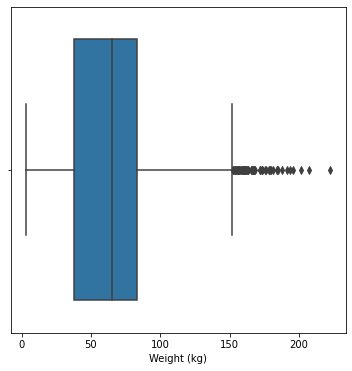

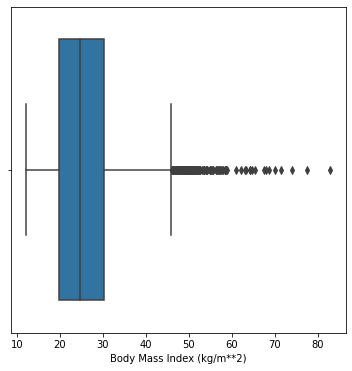

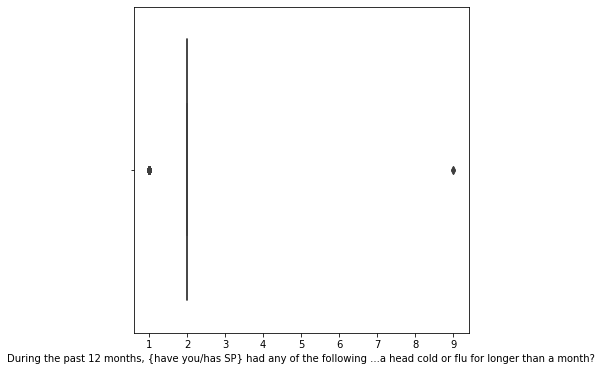

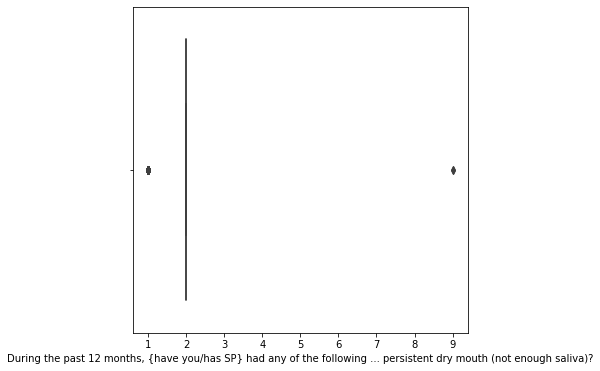

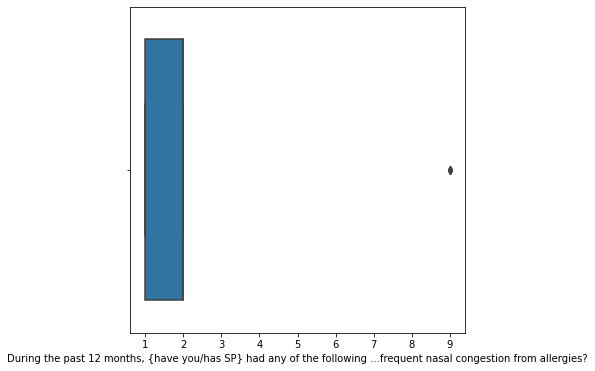

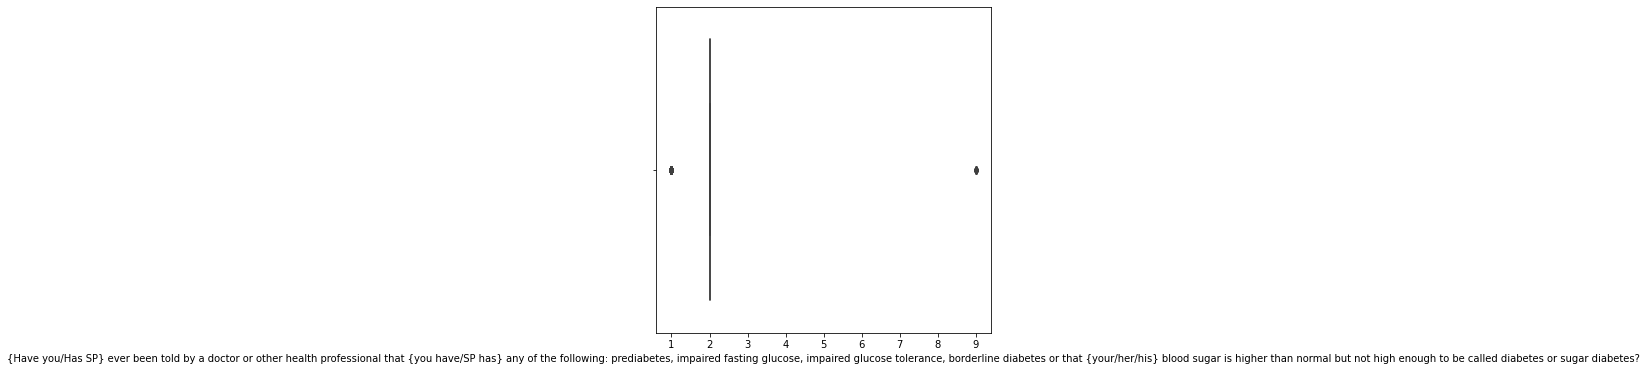

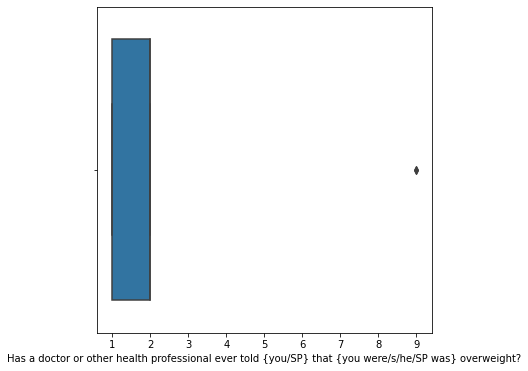

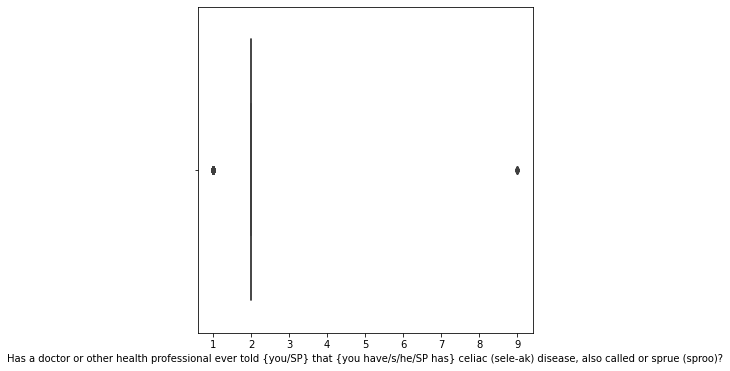

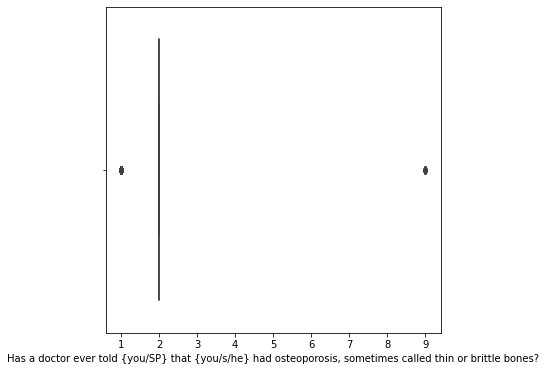

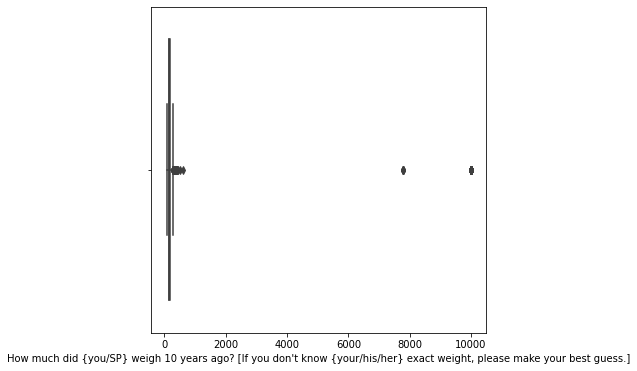

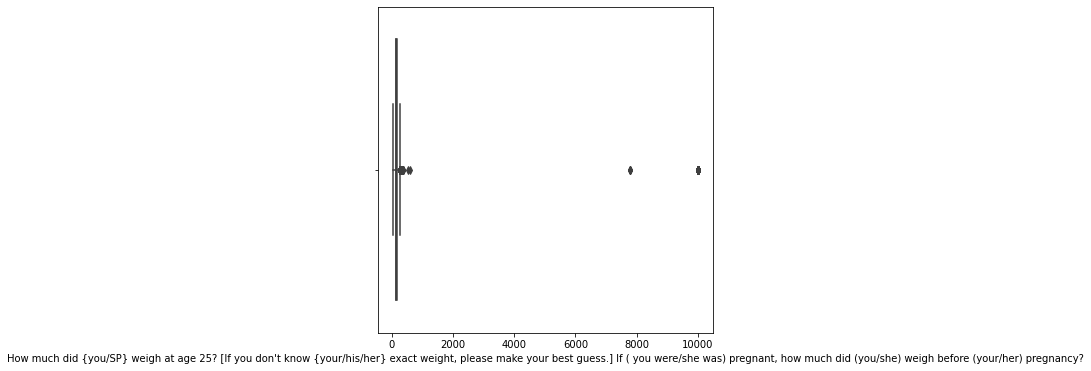

In [32]:
for i in final_df_2.columns:
    box_plot(final_df_2, i)